In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Importing the required libraries

In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve, roc_auc_score

# Loading Images from Folder

In [3]:
# Function to load images from folders
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, folder_name in enumerate(os.listdir(folder)):
        for filename in os.listdir(os.path.join(folder, folder_name)):
            img_path = os.path.join(folder, folder_name, filename)
            image = cv2.imread(img_path)
            if image is not None:
                images.append(image)
                labels.append(label)
    return images, labels

# Function to preprocess images
def preprocess_images(images):
    processed_images = []
    for img in images:
        # Resize image to desired size and normalize pixel values
        resized_img = cv2.resize(img, (150, 150)) / 255.0
        processed_images.append(resized_img)
    return np.array(processed_images)

# Load images and labels
folder_path = "/content/drive/MyDrive/Cricket Legends"
images, labels = load_images_from_folder(folder_path)

# Preprocess images
processed_images = preprocess_images(images)


X_train, X_test, y_train, y_test = train_test_split(processed_images, labels, test_size=0.2, train_size=0.8, random_state=42)


In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", len(y_train))

Shape of X_train: (2733, 150, 150, 3)
Shape of X_test: (684, 150, 150, 3)
Shape of y_train: 2733


In [ ]:
x_train = X_train/255.0
x_test = X_test/255.0

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


Shape of X_train: (2733, 150, 150, 3)
Shape of X_test: (684, 150, 150, 3)


# Visualizing random Images

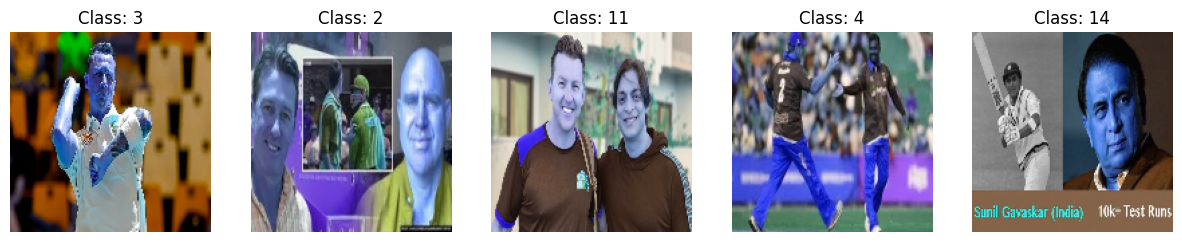

In [ ]:
import matplotlib.pyplot as plt
def plot_random_images(images, labels, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        idx = np.random.randint(len(images))
        axes[i].imshow(images[idx])
        axes[i].set_title(f"Class: {labels[idx]}")
        axes[i].axis('off')
    plt.show()

# Plot random images after preprocessing
plot_random_images(X_train, y_train)

In [ ]:
nsamples, nx, ny, nrgb = x_train.shape
x_train2 = x_train.reshape((nsamples,nx*ny*nrgb))

In [ ]:
nsamples, nx, ny, nrgb = x_test.shape
x_test2 = x_test.reshape((nsamples,nx*ny*nrgb))

In [ ]:
x_train2.shape

(2733, 67500)

In [ ]:
x_test2.shape

(684, 67500)

# Running Models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train2,y_train)
y_pred=model.predict(x_test2)
y_pred

array([ 8,  7,  0,  3, 12,  7, 14,  5, 11,  9, 11,  4,  0, 10,  0, 13, 10,
       13,  6,  0, 14,  6,  1, 11,  0, 11, 10,  6,  3, 14,  5, 11,  8,  0,
       12,  0, 11, 14,  7,  1, 11,  1, 11,  2,  3, 12, 14, 14,  3, 10, 11,
        2,  7,  3, 14, 10, 13,  6,  1,  7,  3,  0, 11,  7,  6,  6, 14,  9,
        0, 10, 12,  0,  0,  6, 11,  5,  6,  7,  5,  3, 12, 13,  2,  6,  9,
       13,  6,  4,  6,  5,  2,  6,  6,  5,  9,  5,  9, 11,  6,  0, 12, 14,
       11,  0, 11,  0, 10,  2,  1, 14, 10,  1,  3,  7,  0,  4,  5,  0,  6,
       13,  1,  9,  5, 11,  3,  3,  0,  9,  3,  5, 14, 10, 12,  4, 10, 11,
        3,  3, 14,  6,  4,  2, 11, 14, 12,  4,  3,  0, 10,  5,  7,  2,  6,
        4, 11, 11,  6,  6, 11,  9,  0,  1,  5, 13,  0,  3,  1, 13,  3, 13,
       13,  1, 12,  0,  7,  0,  0, 10,  2,  4,  3, 11, 14,  9,  1,  7, 13,
       11,  1,  2, 11,  9,  7,  3, 11,  9,  2, 13,  4, 13,  2, 13,  0,  2,
        3, 14,  5, 10, 11, 14,  1,  3, 10, 11,  5,  6,  3, 13, 11,  5,  2,
        4, 11, 14,  0, 14

In [ ]:
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72        59
           1       0.66      0.80      0.72        44
           2       0.66      0.62      0.64        47
           3       0.65      0.58      0.61        59
           4       0.36      0.60      0.45        30
           5       0.68      0.63      0.66        41
           6       0.80      0.68      0.74        57
           7       0.35      0.45      0.40        38
           8       0.69      0.92      0.79        24
           9       0.80      0.59      0.68        54
          10       0.70      0.69      0.69        51
          11       0.78      0.58      0.67        60
          12       0.71      0.86      0.78        37
          13       0.45      0.56      0.50        27
          14       0.82      0.66      0.73        56

    accuracy                           0.66       684
   macro avg       0.66      0.66      0.65       684
weighted avg       0.68   

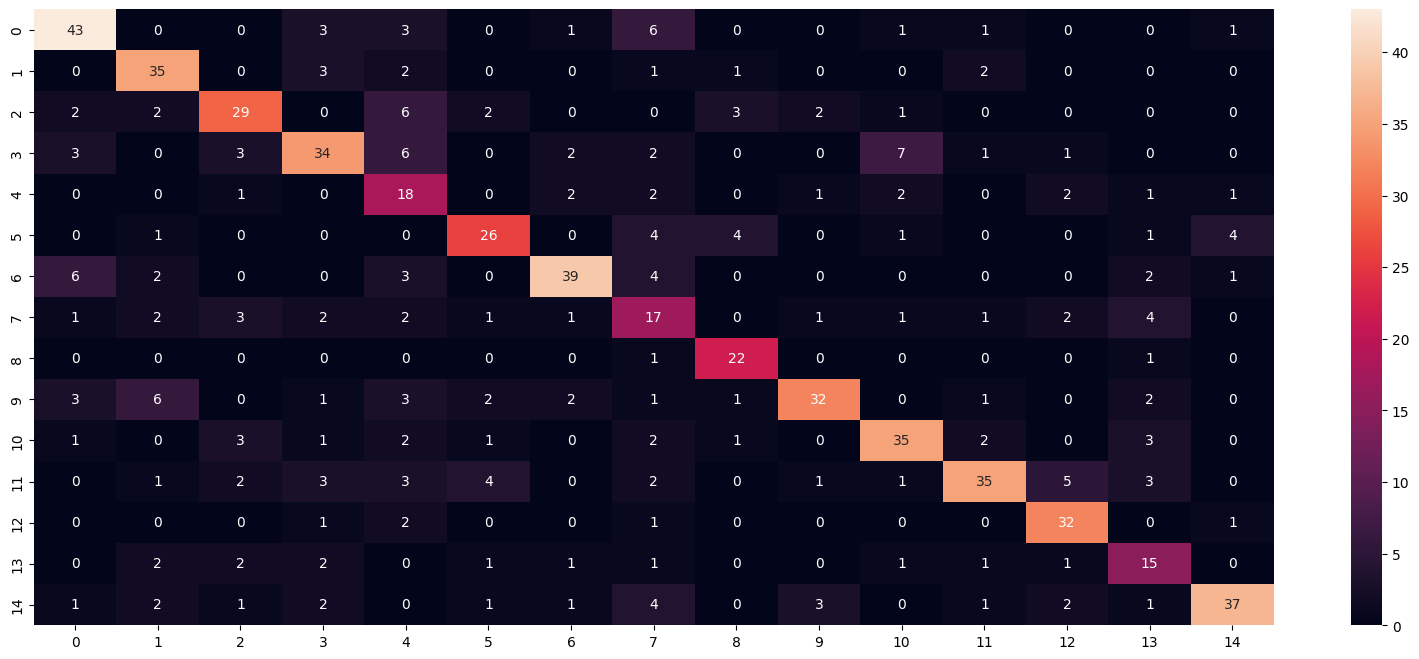

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
cm=confusion_matrix(y_pred,y_test)
plt.figure(figsize=(20,8))
sns.heatmap(data=cm,annot=True)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train2,y_train)
y_pred_knn=knn.predict(x_test2)
y_pred_knn

array([14,  3, 13,  0,  1, 13,  0, 11, 11,  9,  3,  1, 14, 14,  3, 10, 10,
        4,  2,  0,  4,  0,  7,  1,  0, 12,  9,  6,  3,  3,  0,  0,  1,  0,
       14, 11,  0,  3,  0, 12,  7, 14, 11,  5,  0, 11,  5,  0,  1,  8,  0,
        0, 13, 14, 13,  6,  8,  0,  1, 13,  3,  4,  3, 13,  0,  0, 13,  3,
        0,  7,  1,  0,  0,  3,  0, 13,  6, 13, 14,  3, 11,  1,  2,  1, 12,
       13,  0,  0,  0, 13,  8,  7,  8,  4, 14,  5, 13,  0,  3,  0, 14, 11,
        3,  0,  5, 14,  8,  8,  0,  0, 10,  7,  5, 13,  0,  5,  4,  0,  0,
       13,  0,  0, 13, 14,  3,  3, 11,  7,  0,  9, 14,  5,  9, 13,  3, 14,
        3,  2, 13,  0,  8, 13,  3, 14, 13, 14,  3, 14,  1,  5, 13,  4, 11,
        0, 11,  0, 14,  0,  0,  3,  6,  5,  3, 13,  0, 14, 14,  1,  0,  2,
       12,  1,  5, 14, 13,  0,  0, 10,  2,  3,  0,  9, 13, 13,  5,  7,  1,
        3, 13,  1, 12, 13, 13,  3,  3,  7, 12, 14,  0,  1, 13, 14,  0,  3,
        8,  5,  0,  6,  0,  8,  1,  3, 12,  0,  0, 11,  9, 13,  7, 10,  1,
        7, 11, 13,  5,  1

In [ ]:
accuracy_score(y_pred_knn,y_test)
print(classification_report(y_pred_knn,y_test))

              precision    recall  f1-score   support

           0       0.53      0.22      0.31       147
           1       0.17      0.17      0.17        52
           2       0.14      0.29      0.18        21
           3       0.27      0.18      0.21        79
           4       0.04      0.11      0.06        18
           5       0.11      0.10      0.10        42
           6       0.10      0.24      0.14        21
           7       0.17      0.25      0.20        32
           8       0.22      0.26      0.24        27
           9       0.07      0.19      0.11        16
          10       0.16      0.30      0.21        27
          11       0.13      0.22      0.17        27
          12       0.02      0.04      0.03        24
          13       0.30      0.13      0.19        75
          14       0.31      0.18      0.23        76

    accuracy                           0.19       684
   macro avg       0.18      0.19      0.17       684
weighted avg       0.27   

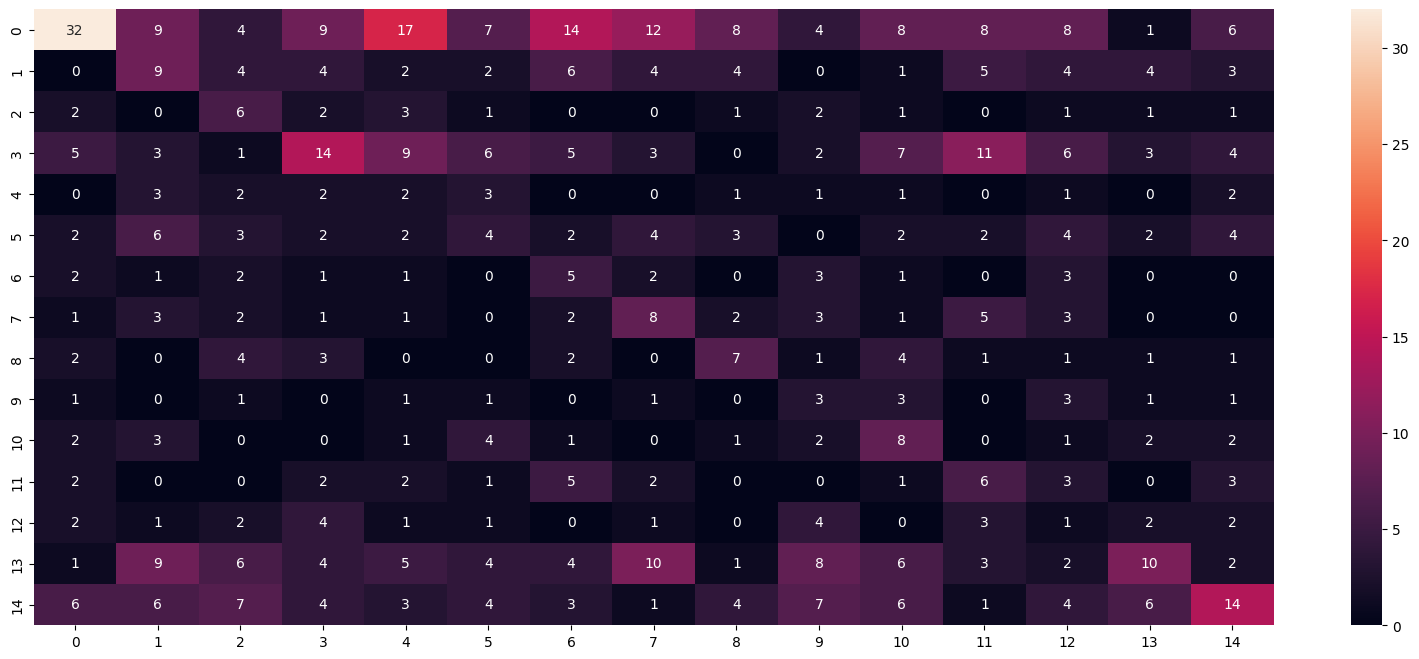

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
cm=confusion_matrix(y_pred_knn,y_test)
plt.figure(figsize=(20,8))
sns.heatmap(data=cm,annot=True)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=3,criterion='gini')
dtc.fit(x_train2,y_train)
y_pred_dtc=dtc.predict(x_test2)
y_pred_dtc

array([ 8,  3,  6,  3, 12,  7, 14,  7, 11,  8, 11,  4, 13,  8,  0, 13, 10,
       14,  7, 11, 14,  6, 13, 11,  0,  7, 10,  6,  2, 14,  3,  3,  8, 10,
       12,  0, 11, 14,  7,  3, 14,  1, 11,  2,  8, 12,  0, 14,  3, 10,  3,
        4,  4,  3,  9, 11,  2,  1,  1,  6,  7, 11, 11,  9,  6,  6,  4, 12,
        0, 10, 12,  0,  0,  5,  9,  8, 11, 13,  7,  2,  0, 13,  1,  2, 10,
       13, 13,  4,  6,  0, 12,  6,  6,  5,  7,  5,  9, 11, 13,  0, 10, 14,
       11, 10, 13,  0, 13,  9,  1,  0, 10,  9,  3, 12,  0,  4,  1,  8,  6,
        4,  1, 12, 11, 10,  3, 11, 10,  4,  2,  5, 14, 10,  9,  4, 10, 11,
        4,  3, 10,  8,  1,  5, 11,  4, 12,  1,  7,  8, 10, 12,  6,  4,  6,
        4, 11, 11, 10,  0, 11,  4,  8,  1,  4,  9,  0,  3,  2, 11, 12, 10,
       13,  1, 12,  0,  9,  0,  0, 10,  6,  4,  4, 14,  2,  5,  1,  7, 13,
       11,  1,  1, 12,  8,  5, 12,  1,  9, 14,  6,  4, 13, 12, 13,  0, 11,
       11, 14,  5, 11, 13, 10, 10,  7,  6, 11,  8,  5,  2, 13,  7,  5,  2,
        5, 11,  0,  7, 14

In [ ]:
accuracy_score(y_pred_dtc,y_test)
print(classification_report(y_pred_dtc,y_test))

              precision    recall  f1-score   support

           0       0.55      0.62      0.58        53
           1       0.47      0.52      0.50        48
           2       0.45      0.43      0.44        47
           3       0.38      0.45      0.42        44
           4       0.38      0.50      0.43        38
           5       0.42      0.37      0.40        43
           6       0.47      0.51      0.49        45
           7       0.17      0.24      0.20        33
           8       0.56      0.46      0.51        39
           9       0.40      0.39      0.40        41
          10       0.52      0.46      0.49        56
          11       0.60      0.47      0.53        57
          12       0.44      0.40      0.42        50
          13       0.42      0.33      0.37        43
          14       0.47      0.45      0.46        47

    accuracy                           0.45       684
   macro avg       0.45      0.44      0.44       684
weighted avg       0.46   

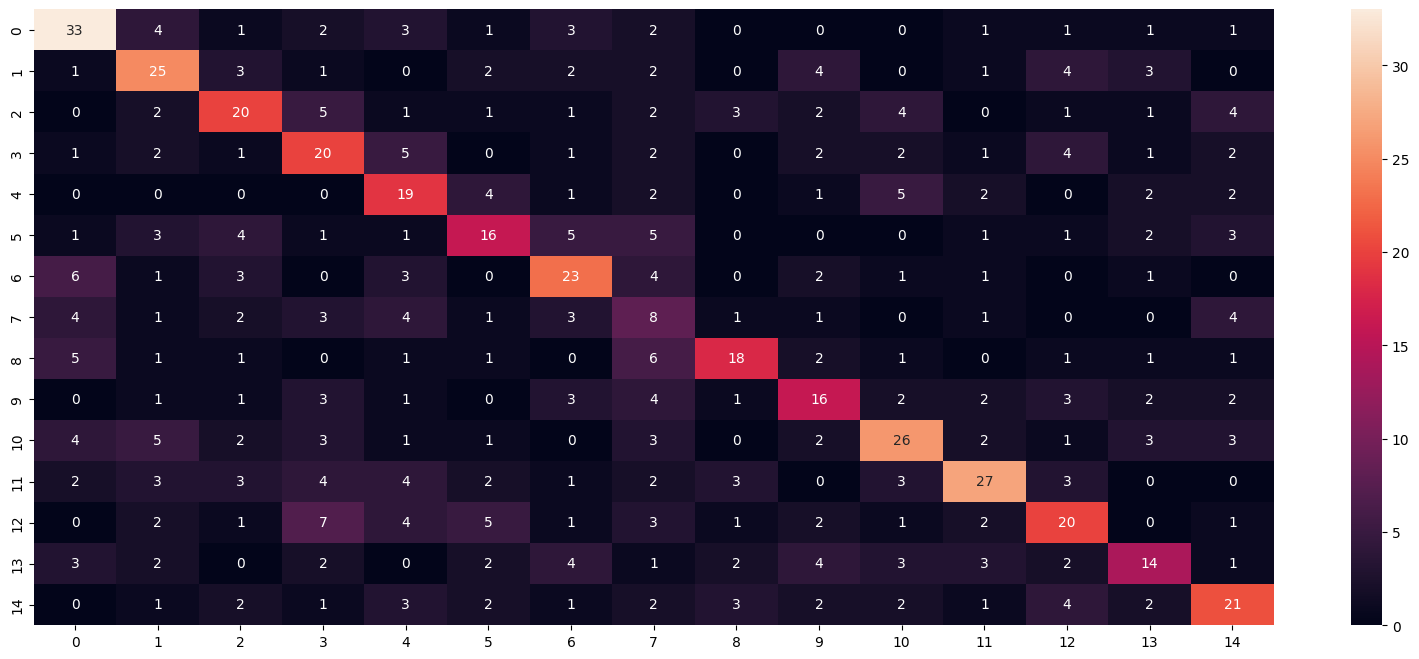

In [ ]:
cm=confusion_matrix(y_pred_dtc,y_test)
plt.figure(figsize=(20,8))
sns.heatmap(data=cm,annot=True)
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train2,y_train)
y_pred_nb=nb.predict(x_test2)
y_pred_nb

array([ 8,  3,  8,  3, 14,  8,  9,  3, 14,  3,  3,  3, 14, 10,  3, 10, 10,
        8,  6,  3, 14,  0,  9,  3,  0,  3, 10,  3,  3,  3,  3,  3,  0,  0,
       14, 14, 11,  1,  3,  8, 11,  8,  3,  9,  3, 14,  3,  3,  3,  7,  3,
        1, 14,  4,  2, 11,  9,  0,  3,  8,  1,  9, 11,  8, 14, 14, 14,  1,
        0,  1,  4,  3,  3,  6,  3,  8,  6,  8, 14,  3,  8,  3,  2,  6, 11,
        8,  4,  9,  8,  5,  8,  3,  9,  0,  9,  5, 13,  3, 10,  0, 13,  3,
       11, 14, 10,  8,  8, 13,  3,  3,  3,  1,  3,  8,  4,  4,  4, 11,  3,
        8,  3,  9,  8,  6,  3,  3, 11,  7,  3, 10,  8,  3, 12,  1,  3,  9,
        3,  8, 13,  0, 10,  8,  3,  3,  8, 11,  8,  9,  3,  9,  8, 10,  3,
        3, 11,  3,  6,  3, 11, 11,  6,  3,  3,  8,  9,  9,  3,  3, 10,  8,
       11,  3,  3,  0, 14,  3,  0,  8,  8,  3,  3, 10,  8, 10,  7,  3,  3,
       14, 14,  3, 11, 14,  9,  3, 11,  3,  3,  9, 11,  5,  8, 11,  3,  3,
        3,  3,  5, 10,  3,  9,  3,  1, 13,  3, 11,  6,  3, 11, 14, 10,  3,
        0,  3,  8,  2, 11

In [ ]:
accuracy_score(y_pred_nb,y_test)
print(classification_report(y_pred_nb,y_test))


              precision    recall  f1-score   support

           0       0.15      0.33      0.21        27
           1       0.08      0.15      0.10        27
           2       0.09      0.17      0.12        24
           3       0.56      0.14      0.22       210
           4       0.04      0.14      0.06        14
           5       0.08      0.43      0.13         7
           6       0.18      0.35      0.24        26
           7       0.06      0.25      0.10        12
           8       0.38      0.13      0.19        94
           9       0.17      0.13      0.15        52
          10       0.14      0.13      0.14        52
          11       0.33      0.20      0.25        74
          12       0.02      0.50      0.04         2
          13       0.03      0.08      0.04        13
          14       0.20      0.18      0.19        50

    accuracy                           0.17       684
   macro avg       0.17      0.22      0.15       684
weighted avg       0.32   

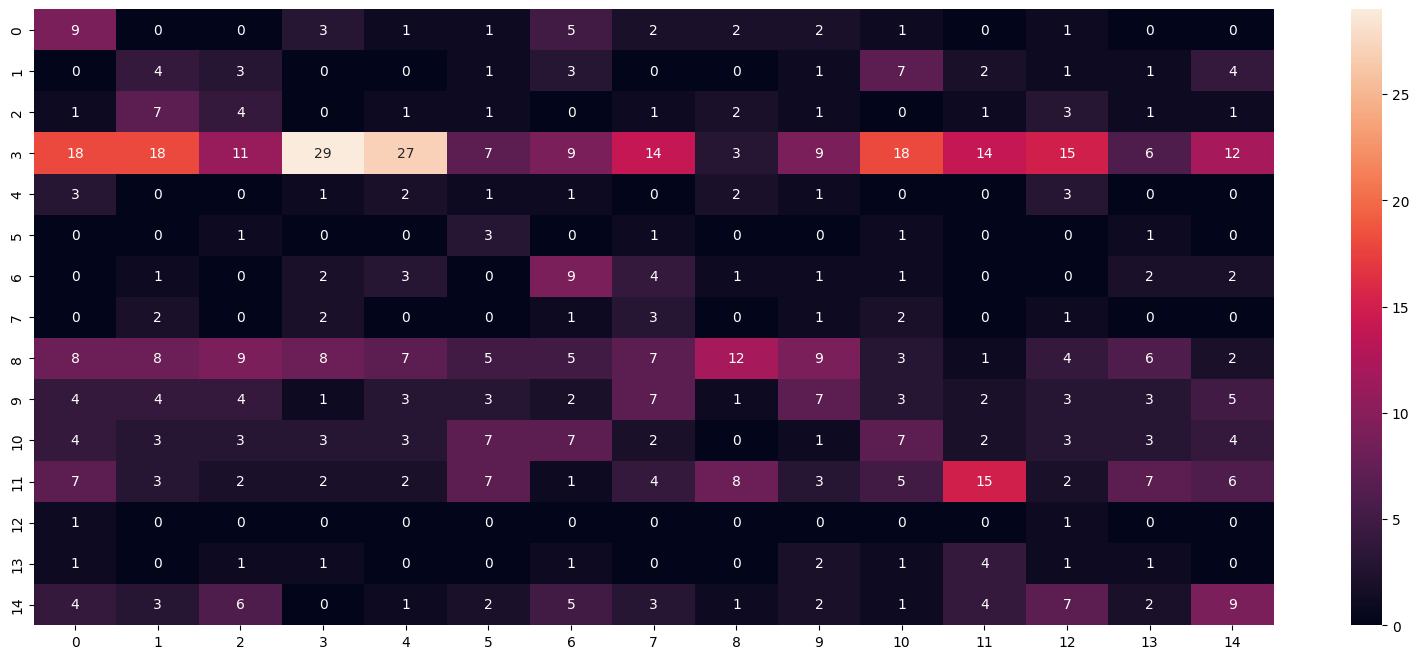

In [ ]:
cm=confusion_matrix(y_pred_nb,y_test)
plt.figure(figsize=(20,8))
sns.heatmap(data=cm,annot=True)
plt.show()

# Comparing Accuracy of Different Models


Random Forestaccuracy:
0.6695906432748538

Decision Treeaccuracy:
0.4473684210526316

Naive Bayesaccuracy:
0.16812865497076024

KNNaccuracy:
0.26608187134502925


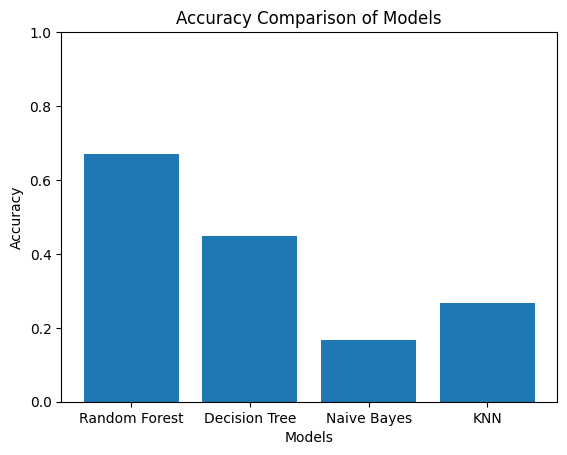

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42,criterion='gini')
nb_model = GaussianNB()
knn_model = KNeighborsClassifier(n_neighbors=3)

models = {'Random Forest': rf_model, 'Decision Tree': dt_model, 'Naive Bayes': nb_model, 'KNN': knn_model}

# Dictionary to store accuracies
accuracies = {}

# Train and evaluate models
for name, model in models.items():
    model.fit(x_train2, y_train)
    y_pred = model.predict(x_test2)
    accuracy = model.score(x_test2, y_test)
    accuracies[name] = accuracy

    # Classification report
    print(f"\n{name}accuracy:")
    print(accuracy_score(y_test, y_pred))

# Bar graph comparing accuracies
plt.bar(accuracies.keys(), accuracies.values())
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Models')
plt.ylim(0, 1)
plt.show()

In [7]:
from sklearn.svm import SVC
# Initialize Random Forest model
svm_model = SVC(kernel='poly', C=1)
svm_model.fit(x_train2, y_train)
# Perform cross-validation for Random Forest
accuracy = svm_model.score(x_test2, y_test) # Taking the mean of cross-validation scores

# Print the accuracy
print("SVM accuracy:", accuracy)


SVM accuracy: 0.652046783625731


# Running an Ensemble model

In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble_clf = VotingClassifier(estimators=[('Random Forest', rf_model), ('Decision Tree', dt_model), ('Naive Bayes', nb_model), ('KNN', knn_model)], voting='hard')
ensemble_clf.fit(x_train2, y_train)

VotingClassifier(estimators=[('Random Forest',
                              RandomForestClassifier(random_state=42)),
                             ('Decision Tree',
                              DecisionTreeClassifier(random_state=42)),
                             ('Naive Bayes', GaussianNB()),
                             ('KNN', KNeighborsClassifier(n_neighbors=3))])

In [ ]:
print(accuracy_score(ensemble_clf.predict(x_test2),y_test))

0.5350877192982456


In [ ]:
print(classification_report(ensemble_clf.predict(x_test2),y_test))


              precision    recall  f1-score   support

           0       0.77      0.39      0.51       119
           1       0.64      0.53      0.58        64
           2       0.57      0.45      0.50        56
           3       0.67      0.34      0.45       104
           4       0.28      0.52      0.36        27
           5       0.50      0.63      0.56        30
           6       0.55      0.69      0.61        39
           7       0.27      0.57      0.37        23
           8       0.66      0.66      0.66        32
           9       0.55      0.71      0.62        31
          10       0.50      0.68      0.57        37
          11       0.67      0.70      0.68        43
          12       0.40      0.90      0.55        20
          13       0.27      0.53      0.36        17
          14       0.62      0.67      0.64        42

    accuracy                           0.54       684
   macro avg       0.53      0.60      0.54       684
weighted avg       0.60   

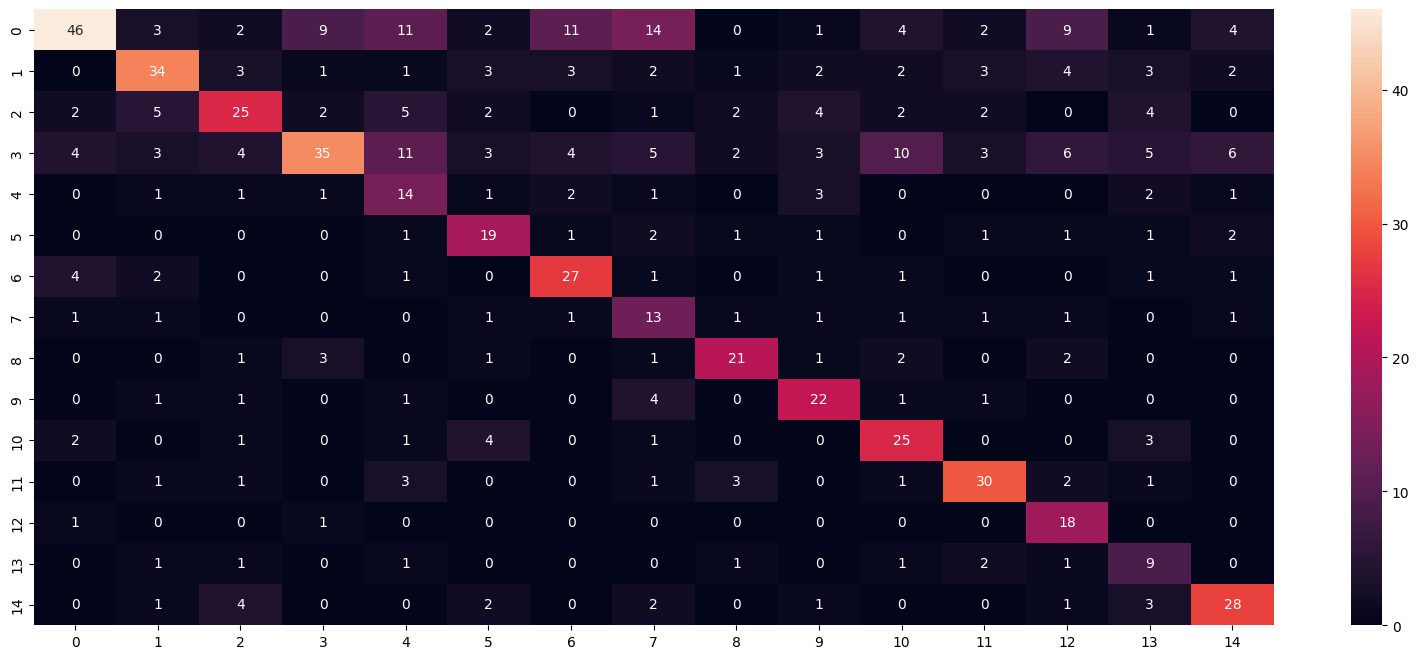

In [ ]:
cm=confusion_matrix(ensemble_clf.predict(x_test2),y_test)
plt.figure(figsize=(20,8))
sns.heatmap(data=cm,annot=True)
plt.show()

## Trying Cross validation with the Best Model

In [4]:
nsamples, nx, ny, nrgb = X_train.shape
x_train2 = X_train.reshape((nsamples,nx*ny*nrgb))

In [5]:
nsamples, nx, ny, nrgb = X_test.shape
x_test2 = X_test.reshape((nsamples,nx*ny*nrgb))

Random Forest accuracy: 0.555068940809343


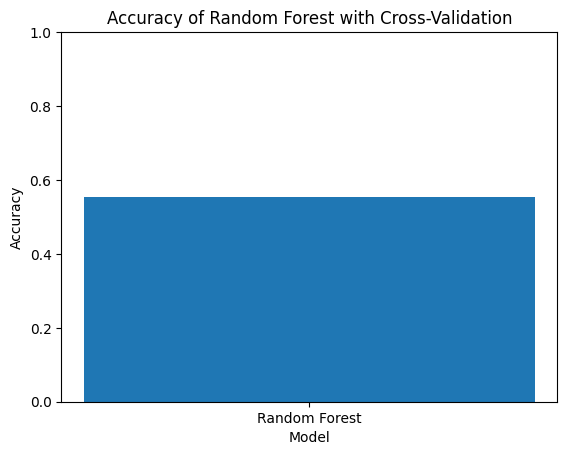

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation for Random Forest
scores = cross_val_score(rf_model, x_train2, y_train, cv=5)
accuracy = scores.mean()  # Taking the mean of cross-validation scores

# Print the accuracy
print("Random Forest accuracy:", accuracy)

# Plotting not required for single model, but you can still visualize if needed
plt.bar(["Random Forest"], [accuracy])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Random Forest with Cross-Validation')
plt.ylim(0, 1)
plt.show()


## Trying Ensemble with the two best accuracy giving Models


In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble_clf = VotingClassifier(estimators=[('Random Forest', rf_model), ('SVM', svm_model)], voting='hard')
ensemble_clf.fit(x_train2, y_train)


In [9]:
print(accuracy_score(ensemble_clf.predict(x_test2),y_test))

0.6666666666666666
